In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from bias_reduction import lagrangian_subgradient

In [2]:
data = generate_biased_samples()
data_count_dict = get_count_dict(data)
predictions_probs = np.array([predict(*sample) for sample in data])
predictions = get_predictions_from_probs(predictions_probs)
prediction_count_dict = get_count_dict(predictions)

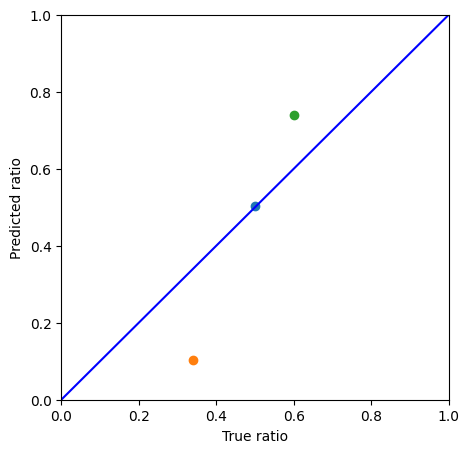

In [3]:
plot_ratio_comparisons(data_count_dict, prediction_count_dict, Gender.MAN, Gender.WOMAN)

In [4]:
accuracy(data, predictions)

0.8221188141254275

In [5]:
MARGIN = 0.05
LEARNING_RATE = 0.00001
ITERATIONS = 300

# ratioMW - gamma <= m/(m+w) <==> m * (ratioMW - gamma - 1) + w * (ratioMW - gamma) <= 0
# ratioMW + gamma >= m/(m+w) <==> m * (-ratioMW - gamma + 1) + w * (-ratioMW - gamma) <= 0
constraints_A = np.array(
    [
        [
            MAN_BIAS[Task.COOKING] - MARGIN - 1,
            MAN_BIAS[Task.COOKING] - MARGIN,
            0.0,
            0.0,
            0.0,
            0.0,
        ],
        [
            -MAN_BIAS[Task.COOKING] - MARGIN + 1,
            -MAN_BIAS[Task.COOKING] - MARGIN,
            0,
            0,
            0,
            0,
        ],
        [
            0.0,
            0.0,
            MAN_BIAS[Task.WALKING] - MARGIN - 1,
            MAN_BIAS[Task.WALKING] - MARGIN,
            0.0,
            0.0,
        ],
        [
            0,
            0,
            -MAN_BIAS[Task.WALKING] - MARGIN + 1,
            -MAN_BIAS[Task.WALKING] - MARGIN,
            0,
            0,
        ],
        [
            0.0,
            0.0,
            0.0,
            0.0,
            MAN_BIAS[Task.DRIVING] - MARGIN - 1,
            MAN_BIAS[Task.DRIVING] - MARGIN,
        ],
        [
            0,
            0,
            0,
            0,
            -MAN_BIAS[Task.DRIVING] - MARGIN + 1,
            -MAN_BIAS[Task.DRIVING] - MARGIN,
        ],
    ]
)

constraints_b = 0

In [6]:
constraints_A

array([[-0.71,  0.29,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.61, -0.39,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.55,  0.45,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.45, -0.55,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.45,  0.55],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.35, -0.65]])

In [7]:
adjusted_predictions_probs = lagrangian_subgradient(
    predictions_probs.reshape(predictions_probs.shape[0], -1),
    constraints_A,
    constraints_b,
    ITERATIONS,
    LEARNING_RATE,
)

In [8]:
adjusted_predictions = get_predictions_from_probs(adjusted_predictions_probs)
adjusted_prediction_count_dict = get_count_dict(adjusted_predictions)

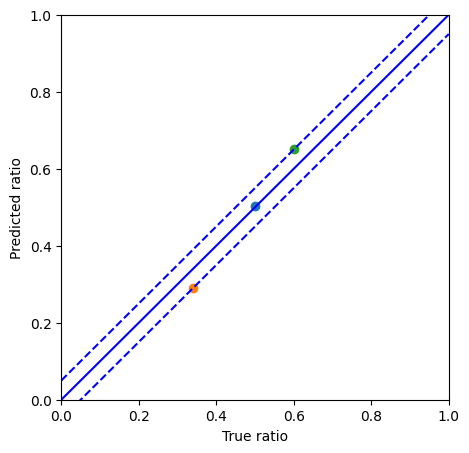

In [9]:
plot_ratio_comparisons(data_count_dict, adjusted_prediction_count_dict, Gender.MAN, Gender.WOMAN, MARGIN)

In [10]:
accuracy(data, adjusted_predictions)

0.881479209861399